In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
sns.set()

In [2]:
heart_dir = '/home/atharva/Projects/Heart Disease/'
heart = pd.read_csv(heart_dir + 'heart.csv')

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


All the targets are '1' in the first 5 rows. The dataset might not be shuffled properly. Let us check:

In [4]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Yes, my speculation was right. We need to shuffle the data first.

In [5]:
heart_shuffled = heart.reindex(np.random.permutation(heart.index))
heart_shuffled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2,0
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3,0
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1


### The attribute description from Kaggle reveals which of these features are categorical.
These are columns sex (male or female), cp (chest pain type), fbs (fasting blood sugar), restecg (ecg result type), exang (presence or absence of exercise-induced angia), thal (normal,fixed defect,reversable defect) and target (presence or absence of heart disease).


In [6]:
cat_columns = ['sex','cp','fbs','restecg','exang','thal','target']

### Now we will one-hot encode these categorical attributes one-by-one:

In [7]:
heart_encoded = heart_shuffled.copy()

In [8]:
#Sex(0 - Female, 1 - Male):
heart_fs = pd.get_dummies(heart_shuffled['sex'])
heart_encoded['sex_male'] = heart_fs[1]
heart_encoded['sex_female'] = heart_fs[0]


In [9]:
#CP(Type_1,Type_2,Type_3):
heart_ss = pd.get_dummies(heart_shuffled['cp'])
heart_encoded['cp_type0'] = heart_ss[0]
heart_encoded['cp_type1'] = heart_ss[1]
heart_encoded['cp_type2'] = heart_ss[2]
heart_encoded['cp_type3'] = heart_ss[3]

In [10]:
#fbs(~blood sugar levels):
heart_ts = pd.get_dummies(heart_shuffled['fbs'])
heart_encoded['low_sugar_level'] = heart_ts[0]
heart_encoded['high_sugar_level'] = heart_ts[1]

In [11]:
#restecg(results):
heart_fs = pd.get_dummies(heart_shuffled['restecg'])
heart_encoded['ecg_result0'] = heart_fs[0]
heart_encoded['ecg_result1'] = heart_fs[1]
heart_encoded['ecg_result2'] = heart_fs[2]

In [12]:
#Exang(Angia yes/no):
heart_fis = pd.get_dummies(heart_shuffled['exang'])
heart_encoded['angia_yes'] = heart_fis[1]
heart_encoded['angia_no'] = heart_fis[0]

In [13]:
"""thal. I couldn't quite find the classes of this attribute as described on the kaggle website,
so I will first check for myself what all classes there are:
"""
heart_encoded['thal'].unique()

array([3, 2, 1, 0])

#### These classes are different than the ones given in the data description.
But I will still one-hot encode and include these as the neural network won't care what it means as long as it is co-related to the targets. This is another example of how machine learning makes analysis so much easier.

In [14]:
heart_sis = pd.get_dummies(heart_shuffled['thal'])
heart_encoded['thal0'] = heart_sis[0]
heart_encoded['thal1'] = heart_sis[1]
heart_encoded['thal2'] = heart_sis[2]
heart_encoded['thal3'] = heart_sis[3]

In [15]:
#Targets(Disease - 1, Normal -0):
heart_ses = pd.get_dummies(heart_shuffled['target'])
heart_encoded['diseased'] = heart_ses[1]
heart_encoded['normal'] = heart_ses[0]

In [16]:
#Now let us drop the original columns:
for column in cat_columns:
    heart_encoded = heart_encoded.drop(column, axis =1)

In [17]:
heart_encoded.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex_male,sex_female,cp_type0,...,ecg_result1,ecg_result2,angia_yes,angia_no,thal0,thal1,thal2,thal3,diseased,normal
269,56,130,283,103,1.6,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,1
230,47,108,243,152,0.0,2,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
206,59,110,239,142,1.2,1,1,1,0,1,...,0,0,1,0,0,0,0,1,0,1
243,57,152,274,88,1.2,1,1,1,0,1,...,1,0,1,0,0,0,0,1,0,1
80,41,112,250,179,0.0,2,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0


### Now, we can proceed with the analysis:

In [18]:
heart_encoded.shape

(303, 26)

In [19]:
heart_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 269 to 32
Data columns (total 26 columns):
age                 303 non-null int64
trestbps            303 non-null int64
chol                303 non-null int64
thalach             303 non-null int64
oldpeak             303 non-null float64
slope               303 non-null int64
ca                  303 non-null int64
sex_male            303 non-null uint8
sex_female          303 non-null uint8
cp_type0            303 non-null uint8
cp_type1            303 non-null uint8
cp_type2            303 non-null uint8
cp_type3            303 non-null uint8
low_sugar_level     303 non-null uint8
high_sugar_level    303 non-null uint8
ecg_result0         303 non-null uint8
ecg_result1         303 non-null uint8
ecg_result2         303 non-null uint8
angia_yes           303 non-null uint8
angia_no            303 non-null uint8
thal0               303 non-null uint8
thal1               303 non-null uint8
thal2               303 non-null u

There are no missing values !

In [20]:
columns = [column for column in heart_encoded.columns]
columns

['age',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'slope',
 'ca',
 'sex_male',
 'sex_female',
 'cp_type0',
 'cp_type1',
 'cp_type2',
 'cp_type3',
 'low_sugar_level',
 'high_sugar_level',
 'ecg_result0',
 'ecg_result1',
 'ecg_result2',
 'angia_yes',
 'angia_no',
 'thal0',
 'thal1',
 'thal2',
 'thal3',
 'diseased',
 'normal']

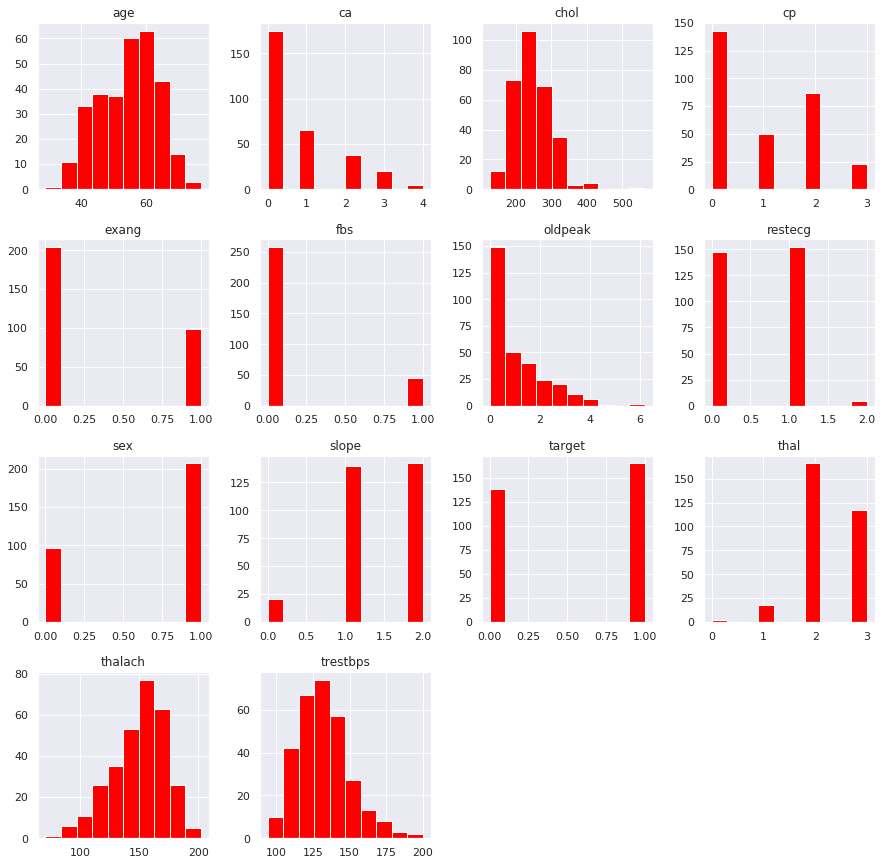

In [21]:
heart_shuffled.hist(figsize = (15,15) ,color = 'red')
plt.show()

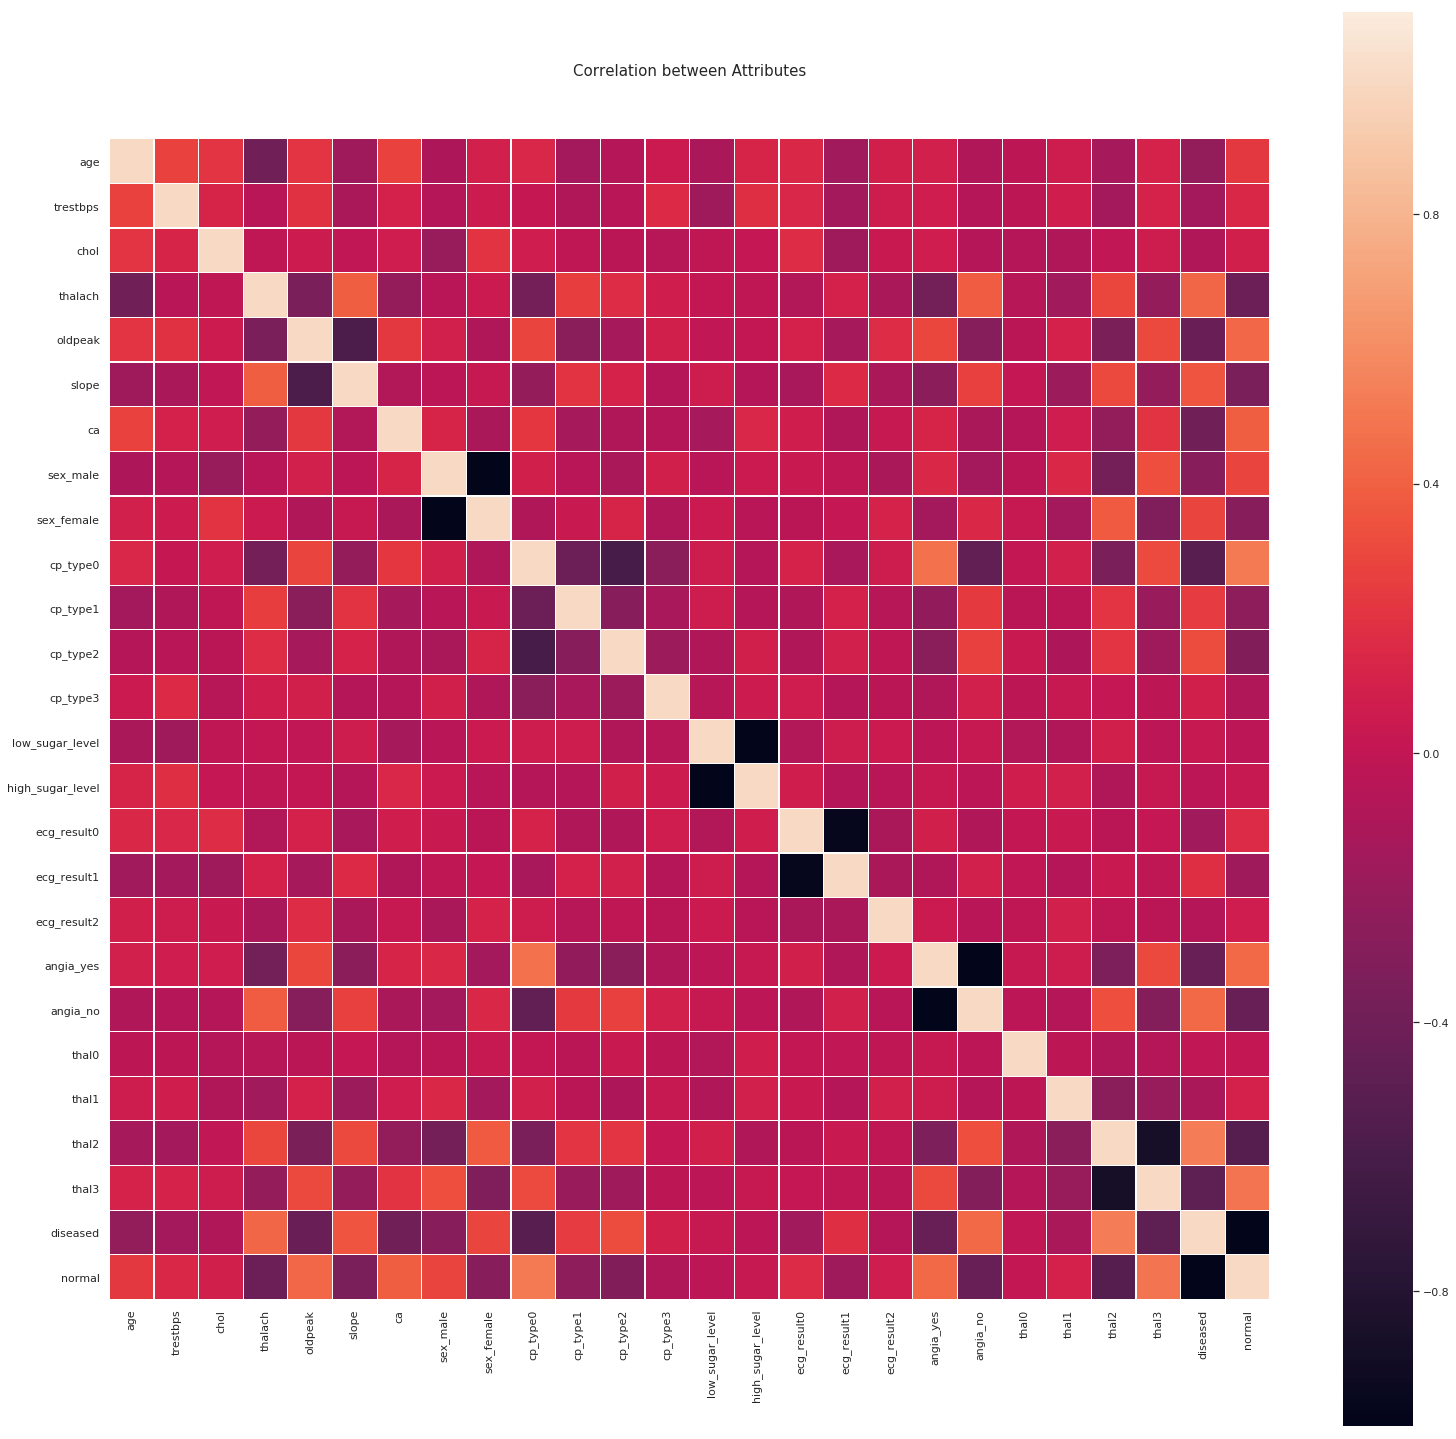

In [22]:
color_pallette = plt.cm.viridis
plt.figure(figsize=(len(columns),len(columns)))
plt.title('Correlation between Attributes', y=1.05, size=15)
sns.heatmap(heart_encoded.astype(float).corr(),linewidths=0.2,vmax=1.1, square=True, 
            linecolor='white', annot=False)



#### This heatmap gives us some useful insights even before implementing any model:

1) Type 1 and 2 chest pain correlate more to having heart disease than Type 0 chest pain.

2) Excercise-Induced angia is closely related to heart disease.

3) Thal2 class is highly correlated to heart disease as well.

## For ths data, I will use a deep-learning neural network.

First, let's seperate the features and the targets:

In [23]:
target_cols = ['diseased','normal']
features = heart_encoded.drop(target_cols, axis =1)
targets = pd.DataFrame(heart_encoded[target_cols])
print 'Features:', features.shape[1],',','Targets:',targets.shape[1]

Features: 24 , Targets: 2


#### Now, let's split the data for training, validation and testing:

In [24]:
samples_count = features.shape[0]

train_samples_count = int(0.8*samples_count)
validation_samples_count = int(0.1* samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

train_inputs = features[:train_samples_count]
train_targets = targets[:train_samples_count]

validation_inputs = features[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = features[train_samples_count+validation_samples_count:]
test_targets = targets[train_samples_count+validation_samples_count:]

In [25]:
np.savez('Heart_data_train', inputs=train_inputs,targets=train_targets)
np.savez('Heart_data_validation', inputs = validation_inputs, targets = validation_targets)
np.savez('Heart_data_test', inputs = test_inputs, targets = test_targets)

### I will now use a custom module of mine to read and load these npz files, called datareader :

The module file is provided in the repo itself, and I invite you to analyse it for yourself and suggest changes/imporvements.

In [26]:
import datareader as dr

/home/atharva/Notebooks


In [28]:
import tensorflow as tf

In [29]:
input_size = 24
output_size = 2
hidden_layer_size = 140
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32,[None,input_size])

targets = tf.placeholder(tf.int32,[None,output_size])

#I have built my network using 3 hidden layers.

weights_1 = tf.get_variable("weights_1",[input_size,hidden_layer_size])
biases_1 = tf.get_variable("biases_1",[hidden_layer_size])

outputs_1 = tf.nn.relu(tf.matmul(inputs,weights_1)+biases_1)

weights_2 = tf.get_variable("weights_2",[hidden_layer_size,hidden_layer_size])
biases_2 = tf.get_variable("biases_2",[hidden_layer_size])

outputs_2 = tf.nn.relu(tf.matmul(outputs_1,weights_2)+biases_2)

weights_3 = tf.get_variable("weights_3",[hidden_layer_size,output_size])
biases_3 = tf.get_variable("biases_3",[output_size])

outputs = tf.matmul(outputs_2,weights_3)+biases_3

loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits =outputs, labels = targets)

mean_loss = tf.reduce_mean(loss)

optimize = tf.train.AdamOptimizer(learning_rate=0.001).minimize(mean_loss)

out_equals_target = tf.equal(tf.argmax(outputs,1), tf.argmax(targets,1))

accuracy = tf.reduce_mean(tf.cast(out_equals_target, tf.float32))

sess = tf.InteractiveSession()

initializer = tf.global_variables_initializer()

sess.run(initializer)

batch_size = 9
max_epochs = 100

prev_validation_loss = 999999999.

train_data = dr.Data_Reader('Heart','train', batch_size)
validation_data = dr.Data_Reader('Heart','validation')

for epoch_counter in range(max_epochs):
    curr_epoch_loss = 0
    
    for inputs_batch, targets_batch in train_data:
        
        _, batch_loss = sess.run([optimize, mean_loss], feed_dict ={inputs: inputs_batch,
                                                                    targets: targets_batch})
        
        curr_epoch_loss += batch_loss
        
    curr_epoch_loss /= train_data.batch_count
    
    validation_loss = 0
    validation_accuracy = 0.
    
    for inputs_batch, targets_batch in validation_data:
        
        validation_loss, validation_accuracy = sess.run([mean_loss, accuracy], 
                                                        feed_dict ={inputs: inputs_batch,
                                                                    targets: targets_batch})
        
    print('Epoch'+str(epoch_counter+1)+
          '. Training loss: '+'{0:.3f}'.format(curr_epoch_loss)+
          ' Validation loss: '+'{0: 3f}'.format(validation_loss)+
          '. Validation accuracy: '+ '{0:2f}'.format(validation_accuracy*100)+'%')
    
    if validation_loss > prev_validation_loss:
        break
    prev_validation_loss = validation_loss
print('End of training.')

Instructions for updating:
Colocations handled automatically by placer.
Epoch1. Training loss: 1.359 Validation loss:  0.520484. Validation accuracy: 76.666665%
Epoch2. Training loss: 0.603 Validation loss:  0.368186. Validation accuracy: 83.333331%
Epoch3. Training loss: 0.505 Validation loss:  0.359171. Validation accuracy: 86.666667%
Epoch4. Training loss: 0.457 Validation loss:  0.326361. Validation accuracy: 86.666667%
Epoch5. Training loss: 0.441 Validation loss:  0.331740. Validation accuracy: 86.666667%
End of training.


In [30]:
test_data = dr.Data_Reader('Heart','test')

for inputs_batch, targets_batch in test_data:
        
        test_accuracy = sess.run([accuracy], feed_dict ={inputs: inputs_batch,
                                                         targets: targets_batch})
        
test_accuracy_percent = test_accuracy[0]*100
print('Test Accuracy: '+'{0: 3f}'.format(test_accuracy_percent)+'%')

Test Accuracy:  80.645162%


### Accuracy ~80%.

The test accuracy is a bit less than the validation accuracy, which is fair. It is still upwards of 80%, which means that our model hasn't overfitted on the training dataset, and is working quite well.